t=3.886e-07  for sr=0.700000
requires in total 12000.000000 years


<IPython.core.display.Javascript object>


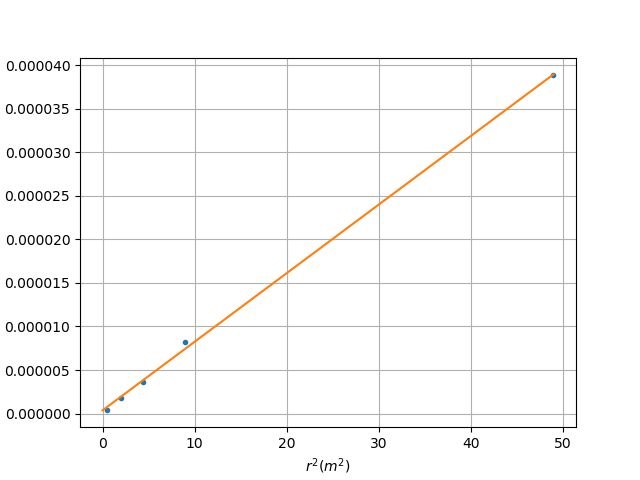

In [3]:
# Homework6
#============================================================
import numpy as np
import random
import matplotlib.pyplot as plt
#============================================================
%matplotlib notebook # magical line of code that prints my plot!
#============================================================
# constants
fmp = 4*10**-3
c = 3.00*10**8

# measuring distance from the origin.
def time(sr):
    """This function calculates the distance from the origin and returns the time 
    it will take to leave the surface."""
    r = 0
    x = 0
    y = 0
    iterations = 0
    while r < sr:
        theta = np.random.uniform(0,2*np.pi)
        x += fmp*np.cos(theta)
        y += fmp*np.sin(theta)
        r = np.sqrt(x**2 + y**2)
        iterations += 1
    return (iterations*fmp)/c

#------------------------------------------------------------
#define radius, and number of trials to be averaged
sr=0.7
testN=100

totalTime=0
for i in range(testN):
    totalTime+=time(sr)
aveTime=totalTime/testN # total amount to time to escape the sun
print('t=%.3e'%aveTime,' for sr=%f'%sr)
#------------------------------------------------------------
# The results I got are:
# R=0.7: average t=4.095e-07 
# R=1.4: average t=1.772e-06
# R=2.1: average t=3.675e-06
# R=3: average t=8.189e-06
# R=7: average t=3.883e-05
#------------------------------------------------------------
# Showing that as r increases time increases linearly.
#------------------------------------------------------------
#data:
sr=np.array([0.7, 1.4, 2.1, 3, 7])
t=np.array([4.095e-07,1.772e-06,3.675e-06,8.189e-06, 3.883e-05])
# linear fit t vs sr^2
p=np.polyfit(sr**2,t,1)
slope=p[0]
intercept=p[1]
t_sun=p[0]*(7e8)**2+p[1]
t_sun_year=round(t_sun/(3600*24*365),-3)
print('requires in total %f years'%t_sun_year) #total amount of years required to travel from core to surface

#plot data vs fit
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(sr**2,t,'.')
ax.plot(np.array([0,49]),np.array([intercept,slope*49+intercept]))
ax.set_xlabel('$r^2 (m^2)$')
ax.set_ylabel('Time (s)')
ax.grid()
plt.show()